# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

from logistic_regression import LogisticRegression

### Load the dataset

In [2]:
# Load the "loan.csv" dataset
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
0,LP001002,Male,No,0,Graduate,5849,0.0,144.0,1.0,Urban,NaN,Y
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y


### Dataset Analysis

In [3]:
# check whether there are missing values
df.isna().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64

In [4]:
# check the type of each feature (categorical or numerical)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Income              614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Tenor          599 non-null    float64
 8   Credit_History      564 non-null    float64
 9   Property_Area       614 non-null    object 
 10  Max_Loan_Amount     589 non-null    float64
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


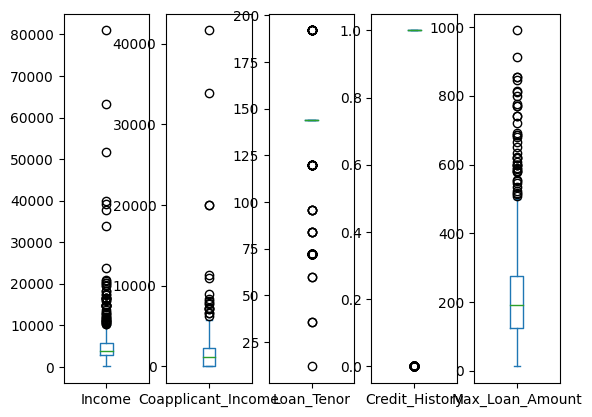

In [5]:
# check whether numerical features have the same scale
df.describe()
df.plot(kind='box', subplots=True)
plt.show()

C:\Users\misho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


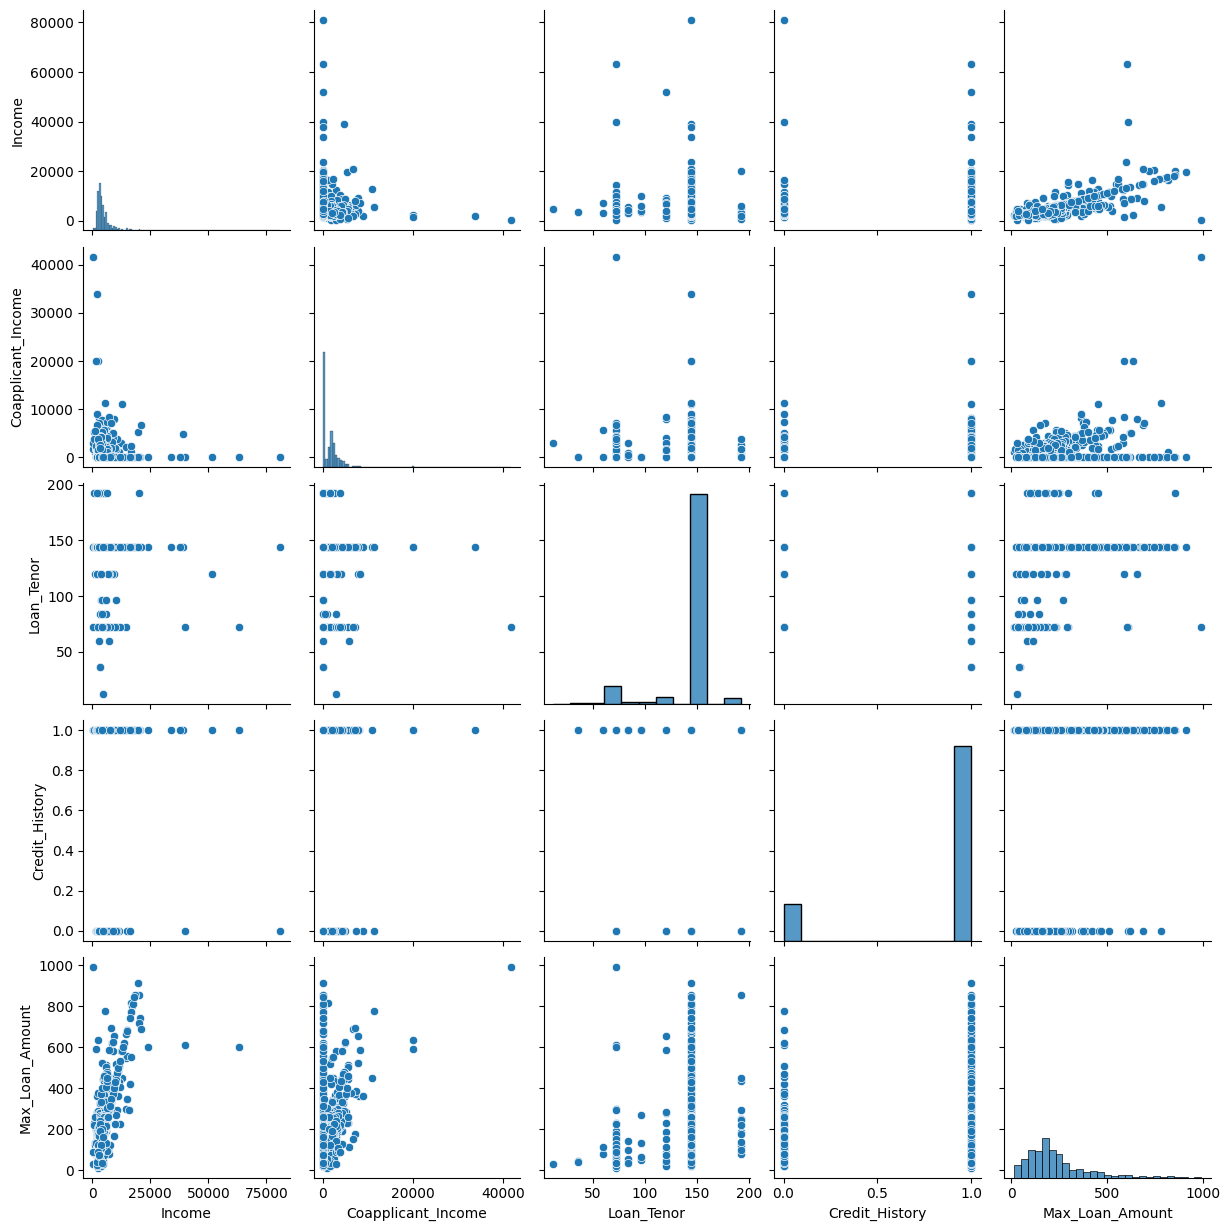

In [6]:
# visualize a pairplot between numercial columns
sns.pairplot(df)

### Dataset Preprocessing

In [7]:
# records containing missing values are removed
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 1 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             513 non-null    object 
 1   Gender              513 non-null    object 
 2   Married             513 non-null    object 
 3   Dependents          513 non-null    object 
 4   Education           513 non-null    object 
 5   Income              513 non-null    int64  
 6   Coapplicant_Income  513 non-null    float64
 7   Loan_Tenor          513 non-null    float64
 8   Credit_History      513 non-null    float64
 9   Property_Area       513 non-null    object 
 10  Max_Loan_Amount     513 non-null    float64
 11  Loan_Status         513 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 52.1+ KB


In [8]:
# the features and targets are separated

# Features: all columns except the target column (Loam_ID, Max_Loan_Amount, Loan_Status)
X = df.drop(columns=['Loan_ID', 'Max_Loan_Amount', 'Loan_Status'])


y = df['Loan_Status']

In [9]:
# the data is shuffled and split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [10]:
# categorical features are encoded

# array of categorical features whose values are of type object
categorical_features = X.select_dtypes(include=[np.object_]).columns.to_numpy()

# dictionary of categorical encoders
categorical_encoders = {}

for feature in categorical_features:
    categorical_encoders[feature] = LabelEncoder()
    X_train[feature] = categorical_encoders[feature].fit_transform(X_train[feature])
    X_test[feature] = categorical_encoders[feature].transform(X_test[feature])

In [11]:
# categorical targets are encoded

y_encoder = LabelEncoder()
y_train = y_encoder.fit_transform(y_train)
y_test = y_encoder.transform(y_test)

In [12]:
for feature in categorical_features:
    label_encoder = categorical_encoders[feature]
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f'{feature}: {mapping}')

mapping = dict(zip(y_encoder.classes_, y_encoder.transform(y_encoder.classes_)))
print(f'Loan_Status: {mapping}')

Gender: {'Female': 0, 'Male': 1}
Married: {'No': 0, 'Yes': 1}
Dependents: {'0': 0, '1': 1, '2': 2, '3+': 3}
Education: {'Graduate': 0, 'Not Graduate': 1}
Property_Area: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Status: {'N': 0, 'Y': 1}


In [13]:
# numerical features are standardized

numerical_features = X.select_dtypes(include=[np.number]).columns.to_numpy()

# remove the 'Credit_History' column from the numerical features
numerical_features = np.delete(numerical_features, np.nonzero(numerical_features == 'Credit_History'))

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


### Logistic Regression Model

In [14]:
# Fit a logistic regression model to the data

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

epoch: 0, cost: 0.6912830570578476
epoch: 100, cost: 0.6178466025214567
epoch: 200, cost: 0.6039067382941405
epoch: 300, cost: 0.5963308590625545
epoch: 400, cost: 0.5900611031102525
epoch: 500, cost: 0.5844341068783432
epoch: 600, cost: 0.5792973991121155
epoch: 700, cost: 0.5745755838285268
epoch: 800, cost: 0.5702141798518015
epoch: 900, cost: 0.56616978570599
epoch: 1000, cost: 0.5624067716009159
epoch: 1100, cost: 0.5588953729387521
epoch: 1200, cost: 0.5556103754137394
epoch: 1300, cost: 0.5525301648377378
epoch: 1400, cost: 0.5496360254909131
epoch: 1500, cost: 0.5469116122908564
epoch: 1600, cost: 0.5443425463872612
epoch: 1700, cost: 0.5419160997637523
epoch: 1800, cost: 0.5396209451132767
epoch: 1900, cost: 0.5374469544294527
epoch: 2000, cost: 0.5353850346007497
epoch: 2100, cost: 0.5334269915911418
epoch: 2200, cost: 0.5315654170582838
epoch: 2300, cost: 0.5297935928396983
epoch: 2400, cost: 0.5281054098536937
epoch: 2500, cost: 0.526495298763037
epoch: 2600, cost: 0.524958

LogisticRegression(learning_rate=0.01, regularization_param=0, epochs=10000, threshold=0.5)

### Testing the Model

In [15]:
y_logistic_pred = logistic_regression_model.predict(X_test)

accuracy = logistic_regression_model.accuracy(y_test, y_logistic_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8446601941747572


### Plot the confusion matrix

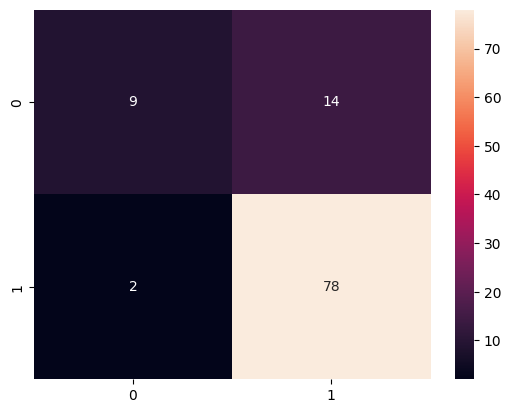

In [16]:
cm = confusion_matrix(y_test, y_logistic_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
